# Imputación y Normalización ( Sección I )

In [1]:
#Importar módulos o paquetes necesarios

%matplotlib inline
import numpy as np
import pandas as pd
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from scipy import stats

In [2]:
#Importar datos

d_eac= pd.read_csv(r"C:\Users\Grios\Desktop\pipe\Proyecto\Correcciones\Apendice_B.csv", sep=";", engine="python")
d_eac

,AÑO,IDNOREMP,CORRELA,IDOJ1,IDAIO,BRUTA,ARRIENDO,SERV_INT,PUBLICI,TRANSP,SERV_EXT,TOTAL_REM,VENTA,TOT_PERSO,INV_PRO,CTO
0,2014,987644,472,11,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2805111.0,10.0,NaN,NaN
1,2014,987634,4711,11,2011,310041.0,25929.0,12747.0,8967.0,38728.0,26930.0,125991.0,3983752.0,11.0,786380.0,3673711.0
2,2014,987630,472,11,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710373.0,11.0,NaN,NaN
3,2014,987622,472,11,1990,374640.0,10368.0,13848.0,1980.0,4596.0,48098.0,115358.0,3677559.0,11.0,355856.5,3302919.0
4,2014,987618,4711,11,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2455223.0,12.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,2017,83975,472,11,2014,305572.0,12600.0,42113.0,NaN,8400.0,6386.0,137078.0,1041532.0,11.0,67617.0,735960.0
3666,2017,83974,472,14,2014,444473.0,1000.0,46394.0,NaN,50242.0,1557.0,195390.0,2512728.0,15.0,174936.0,2068255.0
3667,2017,83973,472,11,2015,206000.0,12000.0,26116.0,NaN,NaN,NaN,107832.0,2183000.0,11.0,34362.0,1977000.0
3668,2017,83961,472,14,2017,2876361.0,NaN,222025.0,NaN,111875.0,76235.0,1852105.0,14534156.0,149.0,736302.0,11657795.0


In [3]:
#Retirar variables

d_eac.drop(['IDOJ1','IDAIO','BRUTA','PUBLICI' ], axis=1, inplace=True)

## Imputar datos

In [4]:
#Hallar la media de cada variable

p_arr = d_eac["ARRIENDO"].mean()
p_sint=d_eac['SERV_INT'].mean()
p_transp=d_eac['TRANSP'].mean()
p_sext=d_eac['SERV_EXT'].mean()
p_totrem=d_eac['TOTAL_REM'].mean()
p_venta=d_eac['VENTA'].mean()
p_totper=d_eac['TOT_PERSO'].mean()
p_invpro=d_eac['INV_PRO'].mean()
p_cto=d_eac['CTO'].mean()

In [5]:
#Asignar valores a las celdas vacias

d_eac.ARRIENDO= d_eac.ARRIENDO.replace(np.nan, p_arr)
d_eac.SERV_INT= d_eac.SERV_INT.replace(np.nan, p_sint)
d_eac.TRANSP= d_eac.TRANSP.replace(np.nan, p_transp)
d_eac.SERV_EXT= d_eac.SERV_EXT.replace(np.nan, p_sext)
d_eac.TOTAL_REM= d_eac.TOTAL_REM.replace(np.nan, p_totrem)
d_eac.VENTA= d_eac.VENTA.replace(np.nan, p_venta)
d_eac.TOT_PERSO= d_eac.TOT_PERSO.replace(np.nan, p_totper)
d_eac.INV_PRO= d_eac.INV_PRO.replace(np.nan, p_invpro)
d_eac.CTO= d_eac.CTO.replace(np.nan, p_cto)

datos=pd.DataFrame(d_eac)
datos

,AÑO,IDNOREMP,CORRELA,ARRIENDO,SERV_INT,TRANSP,SERV_EXT,TOTAL_REM,VENTA,TOT_PERSO,INV_PRO,CTO
0,2014,987644,472,659692.690489,282568.208198,324690.48636,112408.471966,1.014980e+06,2805111.0,10.0,1.741965e+06,1.574793e+07
1,2014,987634,4711,25929.000000,12747.000000,38728.00000,26930.000000,1.259910e+05,3983752.0,11.0,7.863800e+05,3.673711e+06
2,2014,987630,472,659692.690489,282568.208198,324690.48636,112408.471966,1.014980e+06,710373.0,11.0,1.741965e+06,1.574793e+07
3,2014,987622,472,10368.000000,13848.000000,4596.00000,48098.000000,1.153580e+05,3677559.0,11.0,3.558565e+05,3.302919e+06
4,2014,987618,4711,659692.690489,282568.208198,324690.48636,112408.471966,1.014980e+06,2455223.0,12.0,1.741965e+06,1.574793e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
3665,2017,83975,472,12600.000000,42113.000000,8400.00000,6386.000000,1.370780e+05,1041532.0,11.0,6.761700e+04,7.359600e+05
3666,2017,83974,472,1000.000000,46394.000000,50242.00000,1557.000000,1.953900e+05,2512728.0,15.0,1.749360e+05,2.068255e+06
3667,2017,83973,472,12000.000000,26116.000000,324690.48636,112408.471966,1.078320e+05,2183000.0,11.0,3.436200e+04,1.977000e+06
3668,2017,83961,472,659692.690489,222025.000000,111875.00000,76235.000000,1.852105e+06,14534156.0,149.0,7.363020e+05,1.165780e+07


## Normalización de los Datos

In [6]:
D_eac=(datos-datos.min())/(datos.max()-datos.min())
D_eac

,AÑO,IDNOREMP,CORRELA,ARRIENDO,SERV_INT,TRANSP,SERV_EXT,TOTAL_REM,VENTA,TOT_PERSO,INV_PRO,CTO
0,0.0,1.000000,0.0,0.006629,0.005813,0.008565,0.009248,0.010228,0.002916,0.001605,0.017845,0.016319
1,0.0,0.999989,1.0,0.000261,0.000262,0.001022,0.002215,0.001246,0.004159,0.001783,0.008055,0.003807
2,0.0,0.999985,0.0,0.006629,0.005813,0.008565,0.009248,0.010228,0.000706,0.001783,0.017845,0.016319
3,0.0,0.999976,0.0,0.000104,0.000285,0.000121,0.003956,0.001138,0.003836,0.001783,0.003645,0.003423
4,0.0,0.999971,1.0,0.006629,0.005813,0.008565,0.009248,0.010228,0.002547,0.001961,0.017845,0.016319
...,...,...,...,...,...,...,...,...,...,...,...,...
3665,1.0,0.000043,0.0,0.000127,0.000866,0.000221,0.000524,0.001358,0.001056,0.001783,0.000692,0.000763
3666,1.0,0.000042,0.0,0.000010,0.000954,0.001325,0.000127,0.001947,0.002607,0.002496,0.001792,0.002143
3667,1.0,0.000041,0.0,0.000121,0.000537,0.008565,0.009248,0.001062,0.002259,0.001783,0.000352,0.002049
3668,1.0,0.000028,0.0,0.006629,0.004568,0.002951,0.006272,0.018687,0.015286,0.026391,0.007542,0.012081


In [7]:
D_eac.drop(['AÑO','IDNOREMP','CORRELA'], axis=1, inplace=True)

D_eac.to_excel('C:/Users/Grios/Desktop/pipe/Proyecto/Correcciones/Apendice_D.xlsx')


# Mapa de Calor (Sección II)

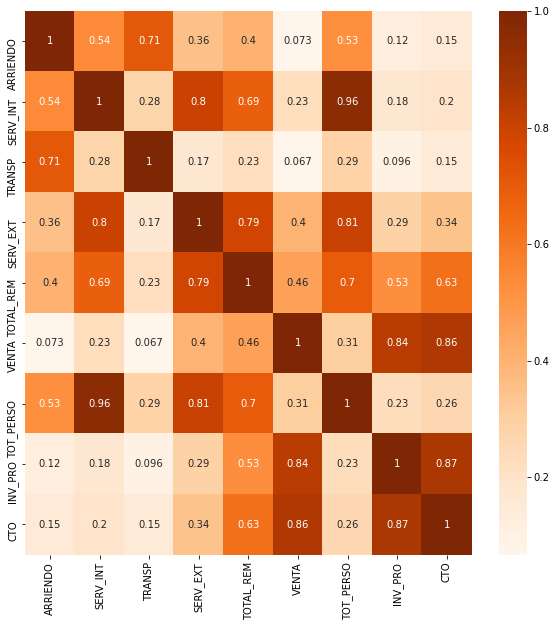

In [8]:
correlation_mat = D_eac.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_mat, cmap= 'Oranges' ,annot = True)
plt.show()

# Metodo de Codo y Clustering (Sección III)

Búsqueda de la cantidad óptima de clusters
calculando que tan similares son los individuos dentro de los clusters

In [9]:
sc = []
for i in range (1,11):                             #crear diferentes agrupaciones con 10 iteraciones
    kmeans= KMeans (n_clusters = i, max_iter=300)
    kmeans.fit(D_eac)
    sc.append (kmeans.inertia_)

Gráfica de resultados de SC (suma de los cudrados) para formar el Codo de Jambú

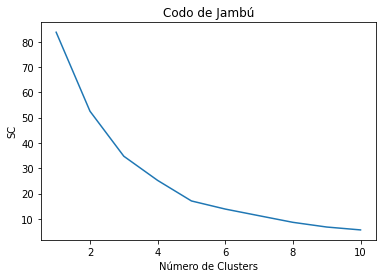

In [10]:
plt.plot(range(1,11), sc)        #eje X toma valores del 1 al 10 y el eje Y los valores de sc
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel('SC')                 #SC, indicador de que tan similares son los individuos dentro de los clusters
plt.show()

El punto en donde deja de disminuir de manera drástica es en 4 o en 5

### Aplicando el método k-means a los datos

In [11]:
clustering= KMeans(n_clusters=5, max_iter=300)
clustering.fit(D_eac)

KMeans(n_clusters=5)

In [12]:
CORR=datos.iloc[:,[2]]

### Agregando la clasificación al archivo original

In [13]:
D_eac['Cluster']= clustering.labels_

D_eac['CORRELA']=CORR
D_eac

,ARRIENDO,SERV_INT,TRANSP,SERV_EXT,TOTAL_REM,VENTA,TOT_PERSO,INV_PRO,CTO,Cluster,CORRELA
0,0.006629,0.005813,0.008565,0.009248,0.010228,0.002916,0.001605,0.017845,0.016319,1,472
1,0.000261,0.000262,0.001022,0.002215,0.001246,0.004159,0.001783,0.008055,0.003807,1,4711
2,0.006629,0.005813,0.008565,0.009248,0.010228,0.000706,0.001783,0.017845,0.016319,1,472
3,0.000104,0.000285,0.000121,0.003956,0.001138,0.003836,0.001783,0.003645,0.003423,1,472
4,0.006629,0.005813,0.008565,0.009248,0.010228,0.002547,0.001961,0.017845,0.016319,1,4711
...,...,...,...,...,...,...,...,...,...,...,...
3665,0.000127,0.000866,0.000221,0.000524,0.001358,0.001056,0.001783,0.000692,0.000763,1,472
3666,0.000010,0.000954,0.001325,0.000127,0.001947,0.002607,0.002496,0.001792,0.002143,1,472
3667,0.000121,0.000537,0.008565,0.009248,0.001062,0.002259,0.001783,0.000352,0.002049,1,472
3668,0.006629,0.004568,0.002951,0.006272,0.018687,0.015286,0.026391,0.007542,0.012081,1,472


### Agrupar datos por clúster y actividad

In [14]:
data=D_eac.groupby(["Cluster","CORRELA"])[['ARRIENDO','SERV_INT','TRANSP','SERV_EXT','TOTAL_REM','VENTA','TOT_PERSO','INV_PRO','CTO']].count()
data

ARRIENDO  SERV_INT  TRANSP  SERV_EXT  TOTAL_REM  VENTA  \
Cluster CORRELA                                                           
0       472            87        87      87        87         87     87   
        4711           24        24      24        24         24     24   
1       472          2924      2924    2924      2924       2924   2924   
        4711          595       595     595       595        595    595   
2       472             3         3       3         3          3      3   
        4711            4         4       4         4          4      4   
3       472            10        10      10        10         10     10   
        4711           11        11      11        11         11     11   
4       4711           12        12      12        12         12     12   

                 TOT_PERSO  INV_PRO   CTO  
Cluster CORRELA                            
0       472             87       87    87  
        4711            24       24    24  
1       472           2924     2924  2924  
        4711           595      595   595  
2       472              3        3     3  
        4711             4        4     4  
3       472             10       10    10  
        4711            11       11    11  
4       4711            12       12    12

In [15]:
# Se seleccionan los datos atípicos
x= (D_eac[(D_eac["Cluster"]==1)].index, D_eac[(D_eac["Cluster"]==2)].index, D_eac[(D_eac["Cluster"]==3)].index)
x

(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669],
            dtype='int64', length=3519),
 Int64Index([742, 1690, 2617, 3394, 3395, 3433, 3466], dtype='int64'),
 Int64Index([  26,  572,  588,  665,  667,  809,  982, 1519, 1609, 1611, 1612,
             1756, 1930, 2449, 2538, 2540, 2541, 2677, 3305, 3392, 3522],
            dtype='int64'))

## Eliminar valores atípicos

In [16]:
D_eac=D_eac.drop([742, 1690, 2617, 3394, 3395, 3433, 3466, 507, 574, 857, 1449, 1521, 1806, 2379, 2451, 2729, 3241, 3307, 3573, 26, 572, 588, 665, 667, 809, 982, 1519, 1609, 1611, 1612, 1756, 1930, 2449, 2538, 2540, 2541, 2677, 3305, 3392, 3522],axis=0)
D_eac

,ARRIENDO,SERV_INT,TRANSP,SERV_EXT,TOTAL_REM,VENTA,TOT_PERSO,INV_PRO,CTO,Cluster,CORRELA
0,0.006629,0.005813,0.008565,0.009248,0.010228,0.002916,0.001605,0.017845,0.016319,1,472
1,0.000261,0.000262,0.001022,0.002215,0.001246,0.004159,0.001783,0.008055,0.003807,1,4711
2,0.006629,0.005813,0.008565,0.009248,0.010228,0.000706,0.001783,0.017845,0.016319,1,472
3,0.000104,0.000285,0.000121,0.003956,0.001138,0.003836,0.001783,0.003645,0.003423,1,472
4,0.006629,0.005813,0.008565,0.009248,0.010228,0.002547,0.001961,0.017845,0.016319,1,4711
...,...,...,...,...,...,...,...,...,...,...,...
3665,0.000127,0.000866,0.000221,0.000524,0.001358,0.001056,0.001783,0.000692,0.000763,1,472
3666,0.000010,0.000954,0.001325,0.000127,0.001947,0.002607,0.002496,0.001792,0.002143,1,472
3667,0.000121,0.000537,0.008565,0.009248,0.001062,0.002259,0.001783,0.000352,0.002049,1,472
3668,0.006629,0.004568,0.002951,0.006272,0.018687,0.015286,0.026391,0.007542,0.012081,1,472


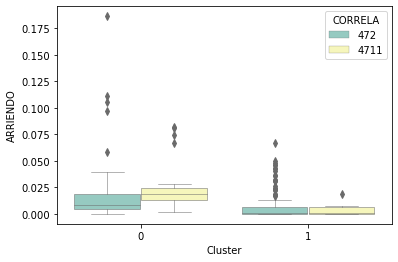

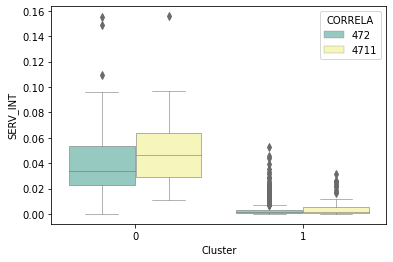

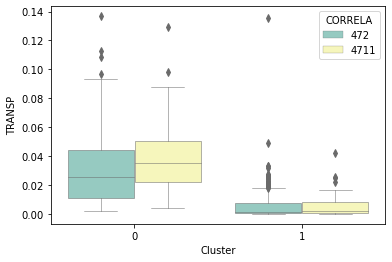

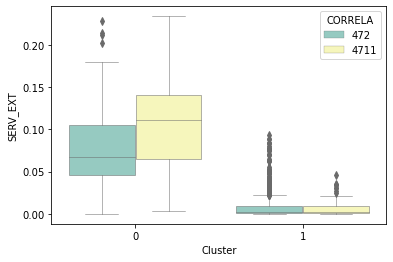

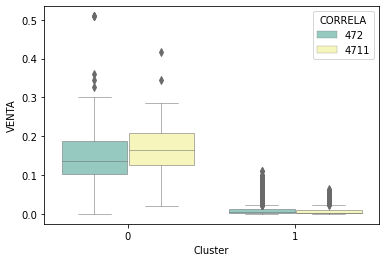

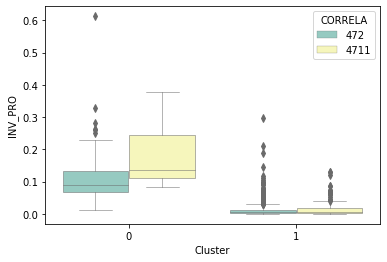

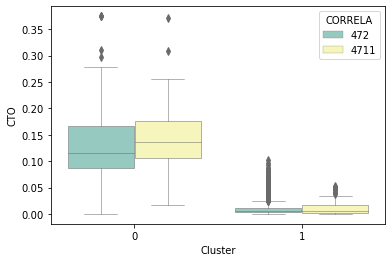

In [17]:
#Diagramas de caja de cada una de las variables

sns.boxplot(x='Cluster', y='ARRIENDO', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()
sns.boxplot(x='Cluster', y='SERV_INT', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()
sns.boxplot(x='Cluster', y='TRANSP', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()
sns.boxplot(x='Cluster', y='SERV_EXT', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()
#sns.boxplot(x='Cluster', y='TOTAL_REM', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
#plt.show()
sns.boxplot(x='Cluster', y='VENTA', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()
#sns.boxplot(x='Cluster', y='TOT_PERSO', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
#plt.show()
sns.boxplot(x='Cluster', y='INV_PRO', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()
sns.boxplot(x='Cluster', y='CTO', hue='CORRELA', data=D_eac, palette="Set3", linewidth=0.5)
plt.show()

In [18]:
D_eac.drop(['Cluster','CORRELA'], axis=1, inplace=True)


# Análisis de componentes principales (PCA) ( Sección IV )

In [19]:
# Guardar en 'VENT' la vatiable 'VENTA'

VENT=D_eac.iloc[:,[6]]

In [20]:
#Eliminar la columna 'VENTA' del dataframe

D_eac.drop(['VENTA'], axis=1, inplace=True)

In [21]:
#Generar la matriz de covarianza

Cov=np.cov(D_eac.T)

In [22]:
cov=pd.DataFrame(Cov)
cov.columns=['ARRIENDO','SERV_INT','TRANSP','TOTAL_REM','TOT_PERSO','SERV_EXT','INV_PRO','CTO']
cov.rename(index={0:'ARRIENDO',1:'SERV_INT', 2:'TRANSP',3:'TOTAL_REM', 4:'TOT_PERSO',5:'SERV_EXT',
                  6:'INV_PRO',7:'CTO'}, inplace=True)
cov

                                     #MATRIZ DE COVARIANZA       

,ARRIENDO,SERV_INT,TRANSP,TOTAL_REM,TOT_PERSO,SERV_EXT,INV_PRO,CTO
ARRIENDO,0.000046,0.000043,0.000027,0.000068,0.000074,0.000074,0.000088,0.000093
SERV_INT,0.000043,0.000090,0.000060,0.000144,0.000144,0.000151,0.000178,0.000206
TRANSP,0.000027,0.000060,0.000078,0.000110,0.000107,0.000113,0.000135,0.000168
TOTAL_REM,0.000068,0.000144,0.000110,0.000332,0.000263,0.000289,0.000329,0.000404
TOT_PERSO,0.000074,0.000144,0.000107,0.000263,0.000306,0.000282,0.000319,0.000385
SERV_EXT,0.000074,0.000151,0.000113,0.000289,0.000282,0.000325,0.000349,0.000431
INV_PRO,0.000088,0.000178,0.000135,0.000329,0.000319,0.000349,0.000834,0.000572
CTO,0.000093,0.000206,0.000168,0.000404,0.000385,0.000431,0.000572,0.000769


In [23]:
#Agregar nuevamente la variable 'VENTA' al dataframe

D_eac['VENTA']=VENT
D_eac

,ARRIENDO,SERV_INT,TRANSP,SERV_EXT,TOTAL_REM,TOT_PERSO,INV_PRO,CTO,VENTA
0,0.006629,0.005813,0.008565,0.009248,0.010228,0.001605,0.017845,0.016319,0.001605
1,0.000261,0.000262,0.001022,0.002215,0.001246,0.001783,0.008055,0.003807,0.001783
2,0.006629,0.005813,0.008565,0.009248,0.010228,0.001783,0.017845,0.016319,0.001783
3,0.000104,0.000285,0.000121,0.003956,0.001138,0.001783,0.003645,0.003423,0.001783
4,0.006629,0.005813,0.008565,0.009248,0.010228,0.001961,0.017845,0.016319,0.001961
...,...,...,...,...,...,...,...,...,...
3665,0.000127,0.000866,0.000221,0.000524,0.001358,0.001783,0.000692,0.000763,0.001783
3666,0.000010,0.000954,0.001325,0.000127,0.001947,0.002496,0.001792,0.002143,0.002496
3667,0.000121,0.000537,0.008565,0.009248,0.001062,0.001783,0.000352,0.002049,0.001783
3668,0.006629,0.004568,0.002951,0.006272,0.018687,0.026391,0.007542,0.012081,0.026391


In [24]:
# Dividir la matriz del dataset en dos partes

X = pd.DataFrame(D_eac.iloc[:,0:8].values)
# la submatriz X contiene los valores de 8 columnas del dataframe y todas las filas (variables independientes)
print(X)

y = D_eac.iloc[:,8].values
# El vector y contiene los valores de la columna ventas para todas las filas (variable dependiente)
print(y)

             0         1         2         3         4         5         6  \
0     0.006629  0.005813  0.008565  0.009248  0.010228  0.001605  0.017845   
1     0.000261  0.000262  0.001022  0.002215  0.001246  0.001783  0.008055   
2     0.006629  0.005813  0.008565  0.009248  0.010228  0.001783  0.017845   
3     0.000104  0.000285  0.000121  0.003956  0.001138  0.001783  0.003645   
4     0.006629  0.005813  0.008565  0.009248  0.010228  0.001961  0.017845   
...        ...       ...       ...       ...       ...       ...       ...   
3625  0.000127  0.000866  0.000221  0.000524  0.001358  0.001783  0.000692   
3626  0.000010  0.000954  0.001325  0.000127  0.001947  0.002496  0.001792   
3627  0.000121  0.000537  0.008565  0.009248  0.001062  0.001783  0.000352   
3628  0.006629  0.004568  0.002951  0.006272  0.018687  0.026391  0.007542   
3629  0.000241  0.000285  0.000086  0.000856  0.001527  0.001605  0.000897   

             7  
0     0.016319  
1     0.003807  
2     0.0163

In [25]:
#Guardar el dataframe

#D_eac.to_excel('C:/Users/Grios/Desktop/pipe/Proyecto/Correcciones/archivo_datos.xlsx')

shape of X_pca (3630, 6)
[0.78749093 0.11130227 0.04405527 0.02095841 0.01258464 0.01012451]
suma: 0.8987931937275497


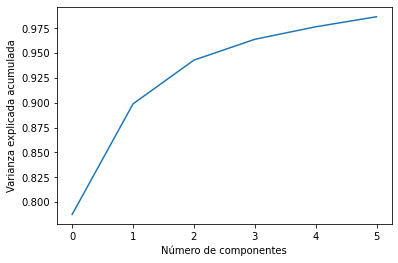

In [26]:
pca=PCA(n_components=6)
pca.fit(X)
X_pca=pca.transform(X) 

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [27]:
# Calculamos los autovalores y autovectores de la matriz

autovalores, autovectores = np.linalg.eig(Cov)

print('Eigenvectors \n%s' %autovectores)
print('\nEigenvalues \n%s' %autovalores)

Eigenvectors 
[[-0.08574241 -0.0496334   0.18232839 -0.18631402  0.3349306   0.76326098
  -0.46701281  0.09685771]
 [-0.17706805 -0.11248991  0.19330199 -0.0924624  -0.90507425  0.16318376
  -0.24156081 -0.07705844]
 [-0.13780053 -0.09978593  0.05209334 -0.02829997  0.15564724 -0.05799688
  -0.11527575 -0.96263232]
 [-0.34184256 -0.28121883  0.33303248  0.78375438  0.05870785  0.15788274
   0.21982137  0.04672319]
 [-0.32940949 -0.26191264  0.38934744 -0.57698941  0.08476144  0.01801725
   0.57244405  0.05640598]
 [-0.35663915 -0.26152563  0.20051783 -0.08242297  0.18228235 -0.58550838
  -0.57507978  0.22505167]
 [-0.5297867   0.83876396  0.11971798  0.01890163  0.01457852 -0.02548261
   0.01547943 -0.00314528]
 [-0.55594404 -0.23520717 -0.78079134 -0.03997974 -0.01911864  0.13681773
   0.05734916  0.0446852 ]]

Eigenvalues 
[2.18852446e-03 3.09321315e-04 1.22434484e-04 5.82457468e-05
 1.20524465e-05 2.54210027e-05 2.81371304e-05 3.49741067e-05]


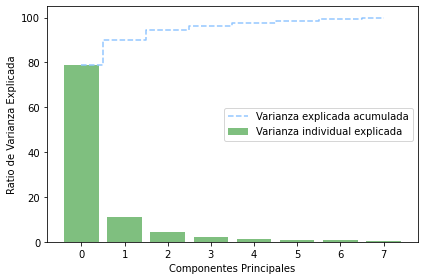

In [28]:
# A partir de los autovalores, calculamos la varianza explicada

tot = sum(autovalores)
var_exp = [(i / tot)*100 for i in sorted(autovalores, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center', label='Varianza individual explicada', color='g')
    plt.step(range(8), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='center right')
    plt.tight_layout()

In [29]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(autovalores[i]), autovectores[:,i]) for i in range(len(autovalores))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

#Esta lista permite hallar el porcentaje de varianza explicada por cada componente

Autovalores en orden descendiente:
0.0021885244563369963
0.0003093213152772885
0.00012243448407120856
5.824574681945927e-05
3.497410665425747e-05
2.8137130403679823e-05
2.542100266267108e-05
1.205244646914532e-05


In [30]:
#Tomar las componenetes que se conservan para el modelo (2)

autovaloresc=autovalores [[0,1]]
autovaloresc

array([0.00218852, 0.00030932])

In [31]:
autovectoresc=autovectores [:,[0,1]]
autovectoresc


array([[-0.08574241, -0.0496334 ],
       [-0.17706805, -0.11248991],
       [-0.13780053, -0.09978593],
       [-0.34184256, -0.28121883],
       [-0.32940949, -0.26191264],
       [-0.35663915, -0.26152563],
       [-0.5297867 ,  0.83876396],
       [-0.55594404, -0.23520717]])

In [32]:
#importar tabulate

from tabulate import tabulate

In [33]:
#Correlacion entre variables y componentes

rxy =[]
for i in range(8):
    for k in range(2):
        aki=autovectoresc[i,k]
        lk=autovaloresc[k]
        Cii=Cov[i,i]
        rxiyk=aki*np.sqrt(lk)/np.sqrt(Cii)
        rxy.append(rxiyk)

print("Correlación entre las variables originales" '\n' "y los componenetes extraídos: ", '\n', '\n',
     tabulate(np.array(rxy).reshape(8,2), ["Comp 1","Comp 2"],
             showindex=['ARRIENDO','SERV_INT','TRANSP','SERV_EXT','TOTAL_REM','TOT_PERSO','INV_PRO','CTO']))

Correlación entre las variables originales
y los componenetes extraídos:  
 
               Comp 1     Comp 2
---------  ---------  ---------
ARRIENDO   -0.5942    -0.129312
SERV_INT   -0.873146  -0.20854
TRANSP     -0.729099  -0.198488
SERV_EXT   -0.878104  -0.271577
TOTAL_REM  -0.880842  -0.263298
TOT_PERSO  -0.925431  -0.255128
INV_PRO    -0.858376   0.510911
CTO        -0.937931  -0.149183


In [34]:
comp = X_pca[:,:2]
trans_comp = np.transpose(comp)
trans_comp

import xlsxwriter

workbook = xlsxwriter.Workbook('C:/Users/Grios/Desktop/pipe/Proyecto/Correcciones/componentes.xlsx')
worksheet = workbook.add_worksheet()

row = 0

for col, data in enumerate(trans_comp):
    worksheet.write_column(row, col, data)

workbook.close()